# Twitter Sentiment Analysis

In [1]:
#Load the dataset
import pandas as pd

df  = pd.read_csv('Tweets.csv')

In [2]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
df['airline_sentiment']

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

Dropping the Neutral reviews is a good idea as we are working on  binary classification problem. 

In [8]:
review_df = df[['text', 'airline_sentiment']]

In [9]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']

In [10]:
review_df.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


From the above summary table it is clear that all the Neutral reviews are removed.
Let us check the count values using value_counts() function

In [11]:
review_df['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

Since reviews are the data labels which are Categorical. Machines can only understand numeric data. Categorical values can be convereted into numeric values using factorize() function. 

In [12]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

0 here represents positive sentiment and 1 represents negative sentiment.

Since this is a sentiment analysis model, text should be converted into something the machine learning model can understand. Basically , text is converted into an array of vector embeddings. 

These word embeddings play a major role in the LSTM deep learning model. 
For this each of the unique words is given an unique number

In [13]:
#retrieve text data from dataset

tweet = review_df.text.values

Tokenization is done which breaks down all the words or sentences of a text into small parts called tokens.

In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(tweet)

The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute

Now, replace the words with their assigned numbers using the text_to_sequence() method

In [16]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length.

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

Long Short Term Memory (LSTM) machine learning model is used for sentiment analysis. The model consists of an embedding layer, LSTM layer and a Dense Layer at the end.

LSTM is a variant of RNN. Advantage of using LSTM over RNN is that text data is processed in parallel which reduces the complexity of model and long term dependencies and memory is restored

LSTM's are good with the time series data. 

Dropout is regularization technique used. It is used to avoid Overfitting. Random neurons are dropped. The layer takes an arguement, a number between 0 and 1 that represents the probability to drop the neurons. 

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
vocab_size = len(tokenizer.word_index) + 1 
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 32)           423488    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 49s 159ms/step - loss: 0.3990 - accuracy: 0.8323 - val_loss: 0.2035 - val_accuracy: 0.9190
Epoch 2/5
289/289 [==============================] - 48s 166ms/step - loss: 0.2140 - accuracy: 0.9162 - val_loss: 0.1642 - val_accuracy: 0.9385
Epoch 3/5
289/289 [==============================] - 48s 166ms/step - loss: 0.1602 - accuracy: 0.9398 - val_loss: 0.1701 - val_accuracy: 0.9454
Epoch 4/5
289/289 [==============================] - 59s 203ms/step - loss: 0.1341 - accuracy: 0.9518 - val_loss: 0.1615 - val_accuracy: 0.9472
Epoch 5/5
289/289 [==============================] - 65s 226ms/step - loss: 0.1110 - accuracy: 0.9610 - val_loss: 0.1863 - val_accuracy: 0.9433


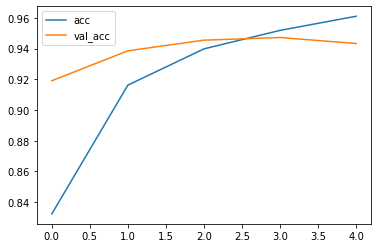

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

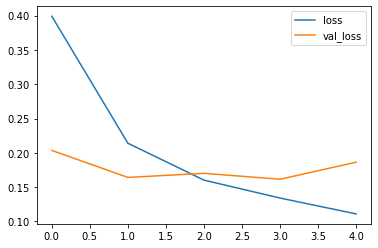

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

#### Execution of Sentiment Analysis Model

Define a function that takes a text as input and outputs its prediction label.

In [39]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

test_sentence3 = "Flying experience was pretty bad!"
predict_sentiment(test_sentence3)

Predicted label:  positive
Predicted label:  negative
Predicted label:  negative
